# Balanced Case

Inputs balanceados, métricas da rede ("rssi", "etx", "delay", "busy_fraction") muito estáveis, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") equilibradas.

## Inputs

In [125]:
%run 1.inputs.ipynb

Edges Inputs salvo em ../datasets/edges_input.csv
Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [126]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [127]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.5802     0.5951       0.8279    
10       0.2517     0.9645       0.9658    
20       0.1126     0.9712       0.9720    
30       0.0715     0.9772       0.9774    
40       0.0569     0.9804       0.9809    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [128]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-80    9.1   27     0.97   0        Ruim     1.00      
-75    6.8   66     0.78   0        Ruim     1.00      
-64    4.6   50     0.86   0        Ruim     1.00      
-64    8.4   70     0.91   0        Ruim     1.00      
-69    4.1   25     0.35   1        Bom      0.72      
-46    2.4   13     0.16   1        Bom      1.00      
-39    3.8   29     0.26   1        Bom      0.99      
-50    1.3   15     0.39   1        Bom      0.99      
-55    2.9   25     0.09   1        Bom      1.00      
-64    2.0   20     0.25   1        Bom      0.99      
-59    5.6   40     0.91   0        Ruim     1.00      
-45    2.9   32     0.04   1        Bom      1.00      
-71    7.3   40     0.37   0        Ruim     0.99      
-51    4.0   36     0.38   1        Bom      0.80      
-38    1.3   34     0.27   1        Bom      1.00      
-50    3.5   15     0.34   1        Bom      0.9

## Fusion

In [129]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-80    9.1   27     0.97   0.67   0.71   0.60   0        Ruim     0.60      
-75    6.8   66     0.78   0.89   0.89   0.68   1        Bom      0.51      
-64    4.6   50     0.86   0.85   0.92   0.78   1        Bom      0.52      
-64    8.4   70     0.91   0.82   0.83   0.73   0        Ruim     0.51      
-69    4.1   25     0.35   0.54   0.70   0.56   1        Bom      0.65      
-46    2.4   13     0.16   0.46   0.67   0.66   1        Bom      0.75      
-39    3.8   29     0.26   0.84   0.87   0.73   1        Bom      0.89      
-50    1.3   15     0.39   0.87   0.83   0.83   1        Bom      0.91      
-55    2.9   25     0.09   0.70   0.54   0.59   1        Bom      0.77      
-64    2.0   20     0.25   0.79   0.89   0.84   1        Bom      0.90      
-59    5.6   40     0.91   0.95   0.86   0.74   1        Bom      0.53      
-45  

## Kalman

In [130]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-80    9.1   27     0.97   0.67   0.71   0.60   0        Ruim     0.60      
-75    6.8   66     0.78   0.89   0.89   0.68   1        Bom      0.51      
-64    4.6   50     0.86   0.85   0.92   0.78   1        Bom      0.52      
-64    8.4   70     0.91   0.82   0.83   0.73   1        Bom      0.51      
-69    4.1   25     0.35   0.54   0.70   0.56   1        Bom      0.54      
-46    2.4   13     0.16   0.46   0.67   0.66   1        Bom      0.59      
-39    3.8   29     0.26   0.84   0.87   0.73   1        Bom      0.64      
-50    1.3   15     0.39   0.87   0.83   0.83   1        Bom      0.69      
-55    2.9   25     0.09   0.70   0.54   0.59   1        Bom      0.70      
-64    2.0   20     0.25   0.79   0.89   0.84   1        Bom      0.72      
-59    5.6   40     0.91   0.95   0.86   0.74   1        Bom      0.70      


## Results

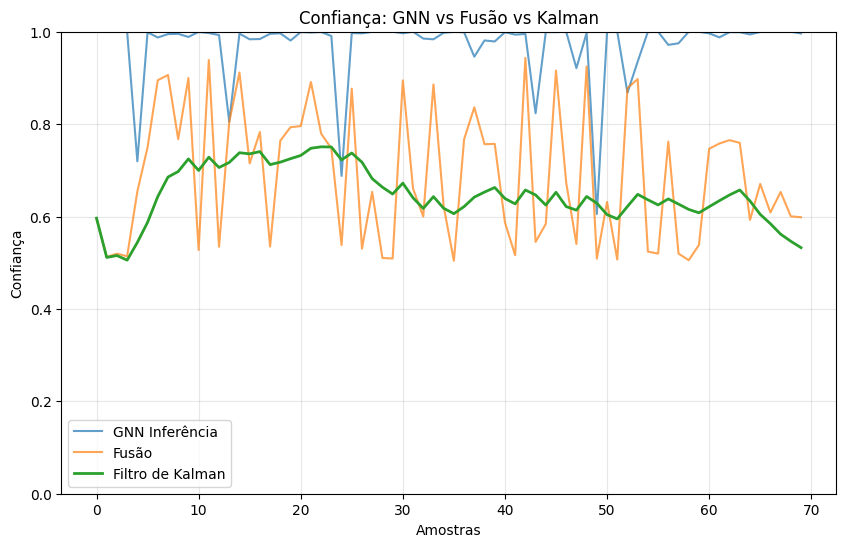

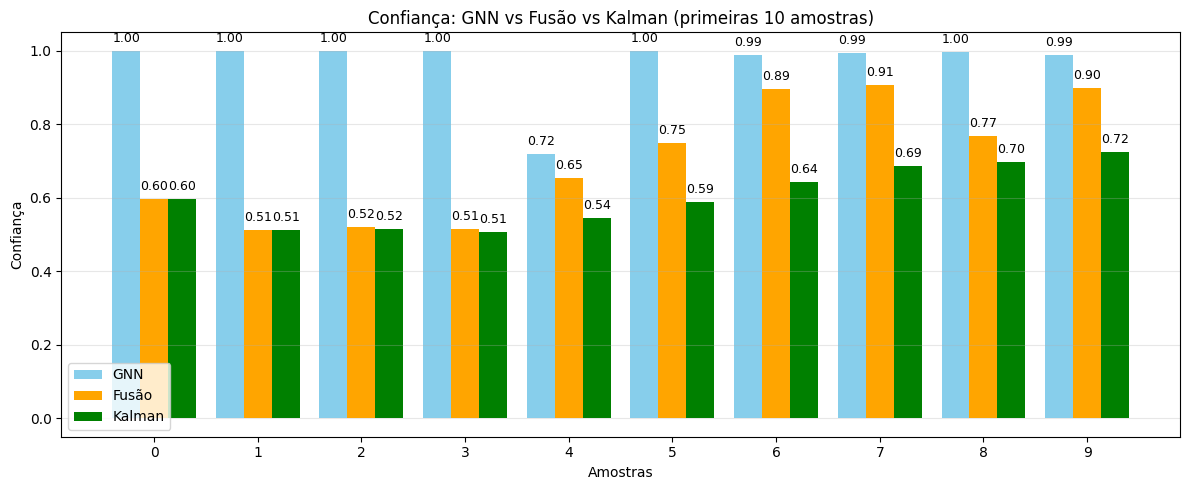

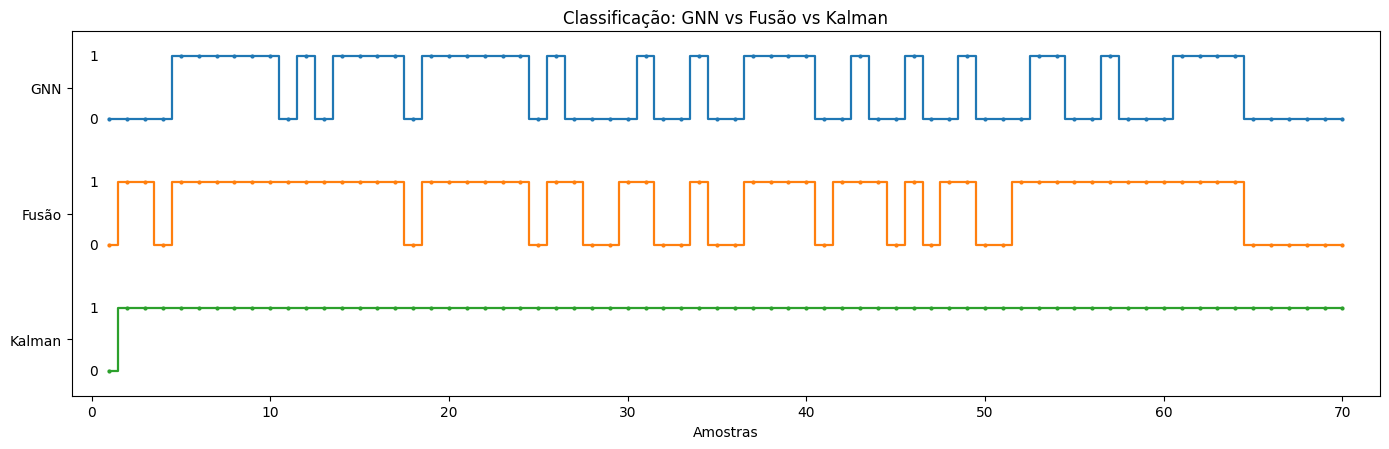

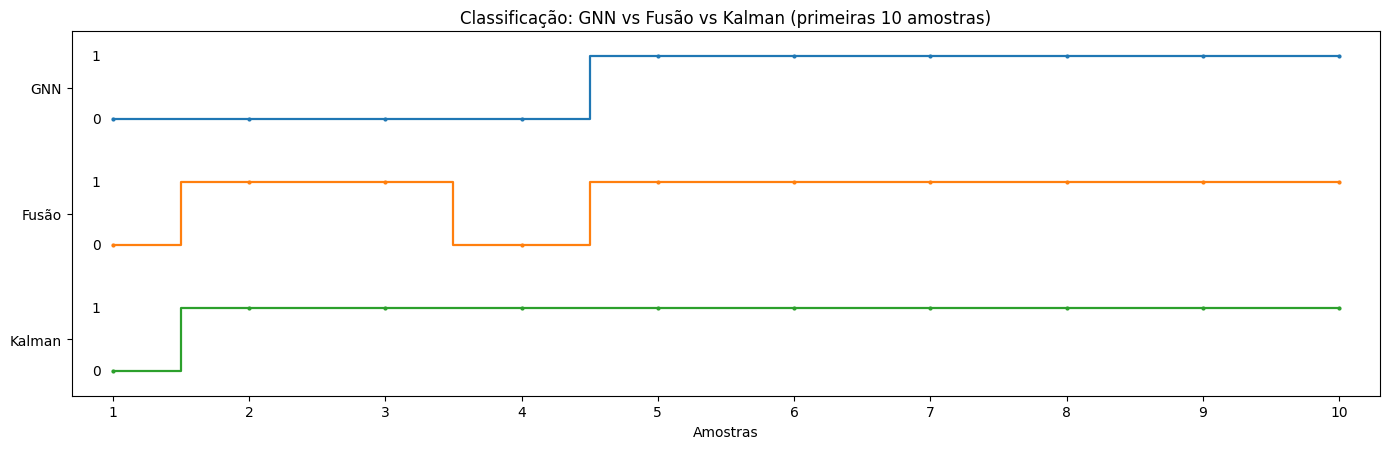

In [131]:
%run 7.results.ipynb

# Worst Case

Inputs péssimos, métricas da rede ("rssi", "etx", "delay", "busy_fraction") muito ruins, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") baixas.

## Inputs

### Imports

In [132]:
import os
import pandas as pd
import numpy as np

### Parameters

In [133]:
num_samples = 70 # quantidade de exemplos

### Worst Inputs

In [134]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas ruins para edge inputs
    # Forçar pelo menos 2 métricas ruins por amostra
    
    # RSSI: sempre baixo (sinal fraco)
    rssi = np.random.uniform(-90, -60)  
    
    # ETX: tendência para alto (mais retransmissões)
    etx = np.random.uniform(4, 10)
    
    # Delay: tendência para alto
    delay = np.random.uniform(30, 100)
    
    # Busy fraction: tendência para alto (canal ocupado)
    busy_fraction = np.random.uniform(0.3, 1.0)
    
    # Adicionar algumas variações extremas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-95, -85)  # RSSI muito baixo
        if np.random.random() < 0.5:
            etx = np.random.uniform(7, 10)      # ETX muito alto
        if np.random.random() < 0.5:
            delay = np.random.uniform(70, 100)  # Delay muito alto
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0.8, 1.0)  # Canal muito ocupado
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [135]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas ruins para radnet
    # Cenários de alta mobilidade, muitos pares, rede congestionada
    
    # APMR: tendência baixa (prefixes ineficientes)
    apmr_edge = np.random.uniform(0.45, 0.65)
    
    # MFSR: tendência baixa (baixa taxa de sucesso)
    mfsr_edge = np.random.uniform(0.50, 0.70)
    
    # IDG: tendência baixa (entrega difícil em grupo)
    idg_global = np.random.uniform(0.45, 0.65)
    
    # Adicionar casos extremamente ruins
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.45, 0.55)  # APMR muito baixo
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.50, 0.60)  # MFSR muito baixo
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.45, 0.55)  # IDG muito baixo
    
    # Garantir ranges válidos
    apmr_edge = max(0.45, min(0.70, apmr_edge))
    mfsr_edge = max(0.50, min(0.75, mfsr_edge))
    idg_global = max(0.45, min(0.70, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [136]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [137]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [138]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [139]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.6299     0.5628       0.6653    
10       0.2939     0.9474       0.9520    
20       0.1340     0.9681       0.9703    
30       0.0785     0.9766       0.9782    
40       0.0585     0.9806       0.9818    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [140]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-86    4.3   51     0.75   0        Ruim     1.00      
-77    7.1   69     0.55   0        Ruim     1.00      
-89    9.0   54     0.72   0        Ruim     1.00      
-66    9.9   33     0.99   0        Ruim     1.00      
-64    8.9   96     0.66   0        Ruim     1.00      
-89    9.4   74     0.95   0        Ruim     1.00      
-94    4.5   78     0.81   0        Ruim     1.00      
-76    7.2   84     0.71   0        Ruim     1.00      
-71    8.6   49     0.91   0        Ruim     1.00      
-60    7.3   62     0.61   0        Ruim     1.00      
-70    4.1   53     0.43   0        Ruim     0.96      
-70    9.3   91     0.70   0        Ruim     1.00      
-86    7.3   64     0.85   0        Ruim     1.00      
-73    4.3   72     0.80   0        Ruim     1.00      
-89    7.5   51     0.95   0        Ruim     1.00      
-85    6.3   31     0.32   0        Ruim     0.9

## Fusion

In [141]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-86    4.3   51     0.75   0.65   0.55   0.60   0        Ruim     0.64      
-77    7.1   69     0.55   0.47   0.70   0.47   0        Ruim     0.66      
-89    9.0   54     0.72   0.49   0.52   0.54   0        Ruim     0.69      
-66    9.9   33     0.99   0.46   0.65   0.54   0        Ruim     0.67      
-64    8.9   96     0.66   0.53   0.65   0.54   0        Ruim     0.65      
-89    9.4   74     0.95   0.64   0.53   0.50   0        Ruim     0.66      
-94    4.5   78     0.81   0.59   0.56   0.57   0        Ruim     0.66      
-76    7.2   84     0.71   0.51   0.62   0.50   0        Ruim     0.67      
-71    8.6   49     0.91   0.54   0.59   0.62   0        Ruim     0.65      
-60    7.3   62     0.61   0.60   0.61   0.65   0        Ruim     0.63      
-70    4.1   53     0.43   0.46   0.62   0.54   0        Ruim     0.66      
-70  

## Kalman

In [142]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-86    4.3   51     0.75   0.65   0.55   0.60   0        Ruim     0.64      
-77    7.1   69     0.55   0.47   0.70   0.47   0        Ruim     0.66      
-89    9.0   54     0.72   0.49   0.52   0.54   0        Ruim     0.68      
-66    9.9   33     0.99   0.46   0.65   0.54   0        Ruim     0.67      
-64    8.9   96     0.66   0.53   0.65   0.54   0        Ruim     0.67      
-89    9.4   74     0.95   0.64   0.53   0.50   0        Ruim     0.67      
-94    4.5   78     0.81   0.59   0.56   0.57   0        Ruim     0.66      
-76    7.2   84     0.71   0.51   0.62   0.50   0        Ruim     0.66      
-71    8.6   49     0.91   0.54   0.59   0.62   0        Ruim     0.66      
-60    7.3   62     0.61   0.60   0.61   0.65   0        Ruim     0.66      
-70    4.1   53     0.43   0.46   0.62   0.54   0        Ruim     0.66      


## Results

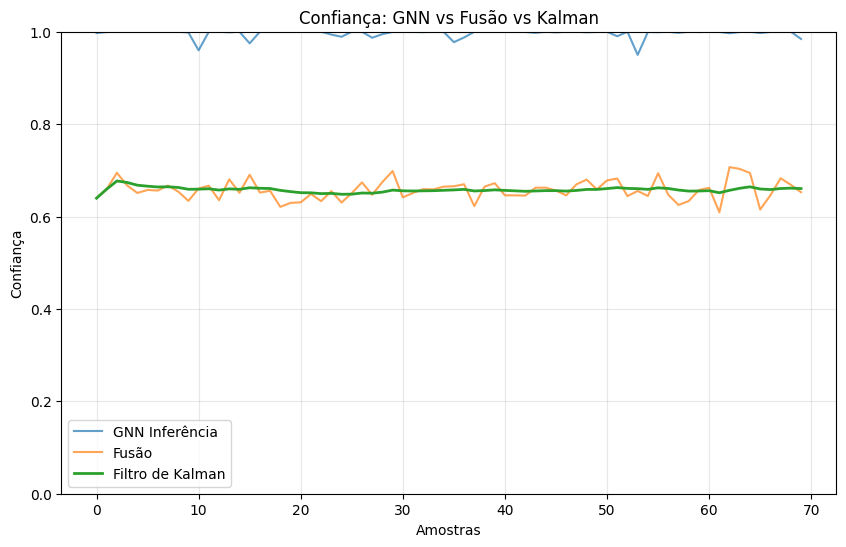

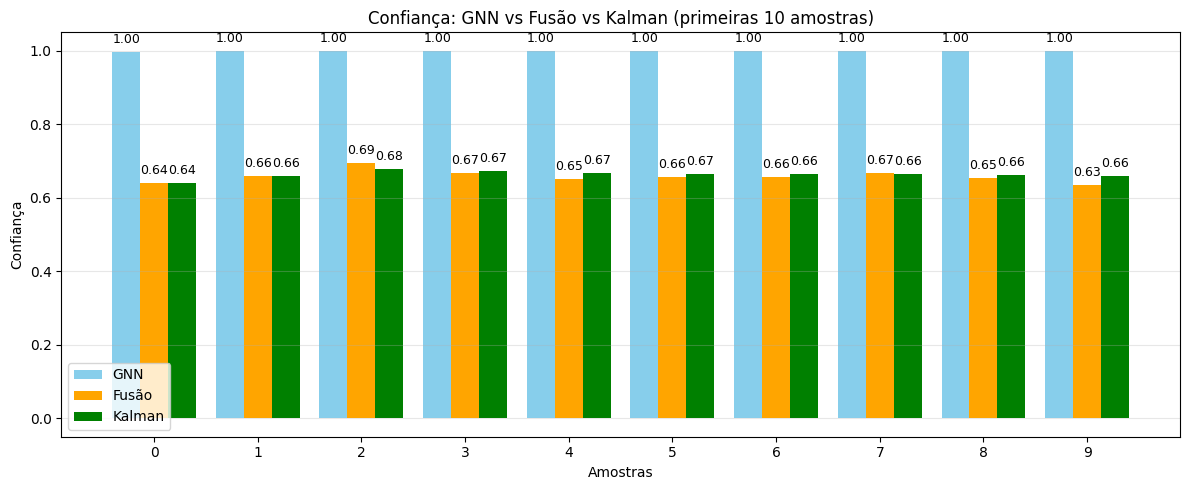

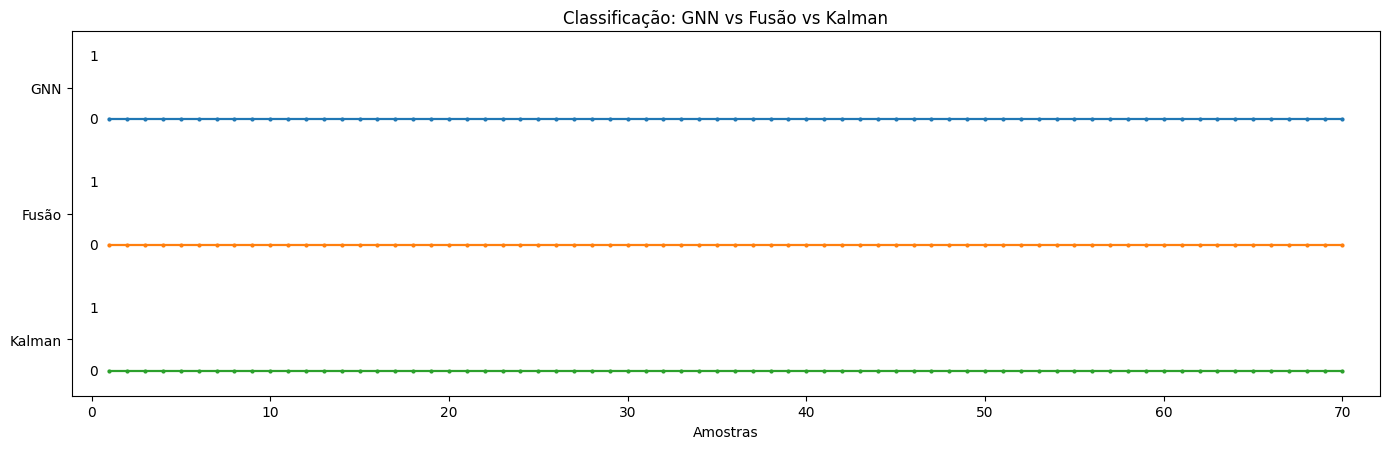

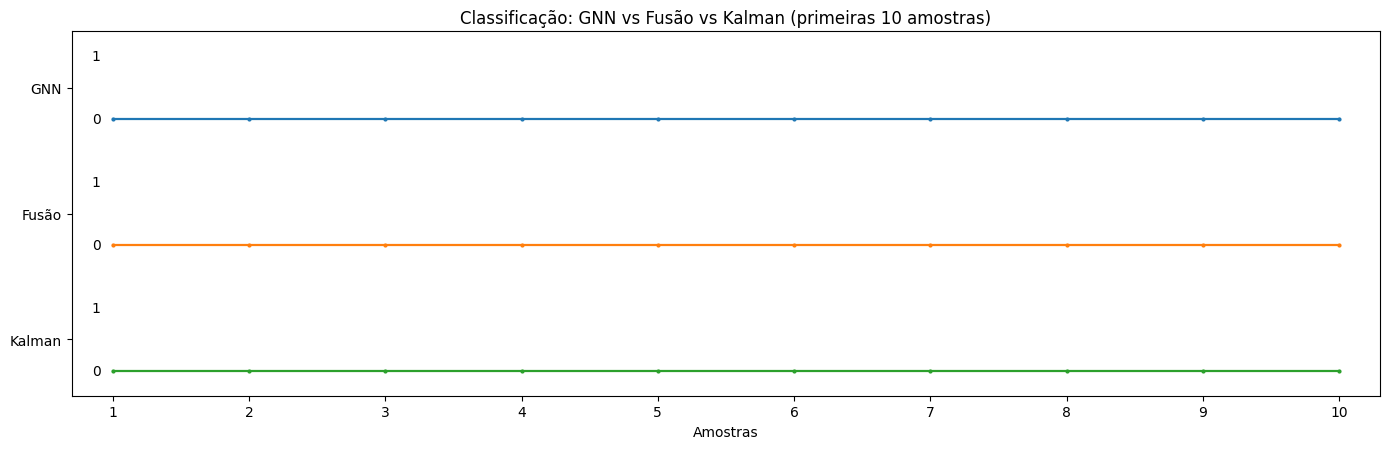

In [143]:
%run 7.results.ipynb

# Best Case

Inputs ótimos, métricas da rede ("rssi", "etx", "delay", "busy_fraction") quase perfeitas, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") altas.

## Inputs

### Imports

In [144]:
import os
import pandas as pd
import numpy as np

### Parameters

In [145]:
num_samples = 70 # quantidade de exemplos

### Best Inputs

In [146]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas boas para edge inputs
    
    # RSSI: sempre alto (sinal forte)
    rssi = np.random.uniform(-65, -30)  
    
    # ETX: tendência para baixo (poucas retransmissões)
    etx = np.random.uniform(1, 4)
    
    # Delay: tendência para baixo
    delay = np.random.uniform(1, 40)
    
    # Busy fraction: tendência para baixo (canal livre)
    busy_fraction = np.random.uniform(0, 0.4)
    
    # Adicionar algumas variações extremas boas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-45, -30)  # RSSI muito alto
        if np.random.random() < 0.5:
            etx = np.random.uniform(1, 2)       # ETX muito baixo
        if np.random.random() < 0.5:
            delay = np.random.uniform(1, 20)    # Delay muito baixo
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0, 0.2)  # Canal muito livre
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [147]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas boas para radnet
    # Cenários de baixa mobilidade, poucos pares, rede estável
    
    # APMR: tendência alta (prefixes eficientes)
    apmr_edge = np.random.uniform(0.75, 0.95)
    
    # MFSR: tendência alta (alta taxa de sucesso)
    mfsr_edge = np.random.uniform(0.80, 0.95)
    
    # IDG: tendência alta (entrega eficiente em grupo)
    idg_global = np.random.uniform(0.70, 0.90)
    
    # Adicionar casos extremamente bons
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.85, 0.95)  # APMR muito alto
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.88, 0.95)  # MFSR muito alto
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.80, 0.90)  # IDG muito alto
    
    # Garantir ranges válidos
    apmr_edge = max(0.70, min(0.98, apmr_edge))
    mfsr_edge = max(0.75, min(0.98, mfsr_edge))
    idg_global = max(0.65, min(0.95, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [148]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [149]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [150]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [151]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.5518     0.8763       0.9594    
10       0.2252     0.9771       0.9771    
20       0.0860     0.9787       0.9790    
30       0.0569     0.9806       0.9811    
40       0.0492     0.9820       0.9824    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [152]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-36    2.4   40     0.39   1        Bom      0.95      
-34    3.3   5      0.21   1        Bom      1.00      
-33    3.8   4      0.21   1        Bom      1.00      
-63    2.3   16     0.17   1        Bom      1.00      
-64    3.3   39     0.23   1        Bom      0.91      
-37    1.4   22     0.19   1        Bom      1.00      
-34    2.5   20     0.34   1        Bom      0.99      
-53    3.3   36     0.39   1        Bom      0.82      
-37    1.1   32     0.21   1        Bom      1.00      
-56    1.8   31     0.01   1        Bom      1.00      
-56    1.3   2      0.27   1        Bom      1.00      
-39    3.2   24     0.14   1        Bom      1.00      
-43    1.6   2      0.02   1        Bom      1.00      
-58    1.6   9      0.15   1        Bom      1.00      
-32    2.0   17     0.28   1        Bom      1.00      
-35    3.8   35     0.28   1        Bom      0.9

## Fusion

In [153]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-36    2.4   40     0.39   0.94   0.95   0.73   1        Bom      0.93      
-34    3.3   5      0.21   0.79   0.91   0.80   1        Bom      0.91      
-33    3.8   4      0.21   0.95   0.92   0.81   1        Bom      0.95      
-63    2.3   16     0.17   0.75   0.93   0.71   1        Bom      0.89      
-64    3.3   39     0.23   0.90   0.93   0.78   1        Bom      0.90      
-37    1.4   22     0.19   0.91   0.94   0.80   1        Bom      0.94      
-34    2.5   20     0.34   0.89   0.94   0.73   1        Bom      0.93      
-53    3.3   36     0.39   0.87   0.83   0.74   1        Bom      0.83      
-37    1.1   32     0.21   0.76   0.82   0.90   1        Bom      0.88      
-56    1.8   31     0.01   0.80   0.82   0.80   1        Bom      0.88      
-56    1.3   2      0.27   0.78   0.87   0.78   1        Bom      0.89      
-39  

## Kalman

In [154]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-36    2.4   40     0.39   0.94   0.95   0.73   1        Bom      0.93      
-34    3.3   5      0.21   0.79   0.91   0.80   1        Bom      0.91      
-33    3.8   4      0.21   0.95   0.92   0.81   1        Bom      0.93      
-63    2.3   16     0.17   0.75   0.93   0.71   1        Bom      0.91      
-64    3.3   39     0.23   0.90   0.93   0.78   1        Bom      0.91      
-37    1.4   22     0.19   0.91   0.94   0.80   1        Bom      0.92      
-34    2.5   20     0.34   0.89   0.94   0.73   1        Bom      0.92      
-53    3.3   36     0.39   0.87   0.83   0.74   1        Bom      0.90      
-37    1.1   32     0.21   0.76   0.82   0.90   1        Bom      0.90      
-56    1.8   31     0.01   0.80   0.82   0.80   1        Bom      0.90      
-56    1.3   2      0.27   0.78   0.87   0.78   1        Bom      0.90      


## Resuts

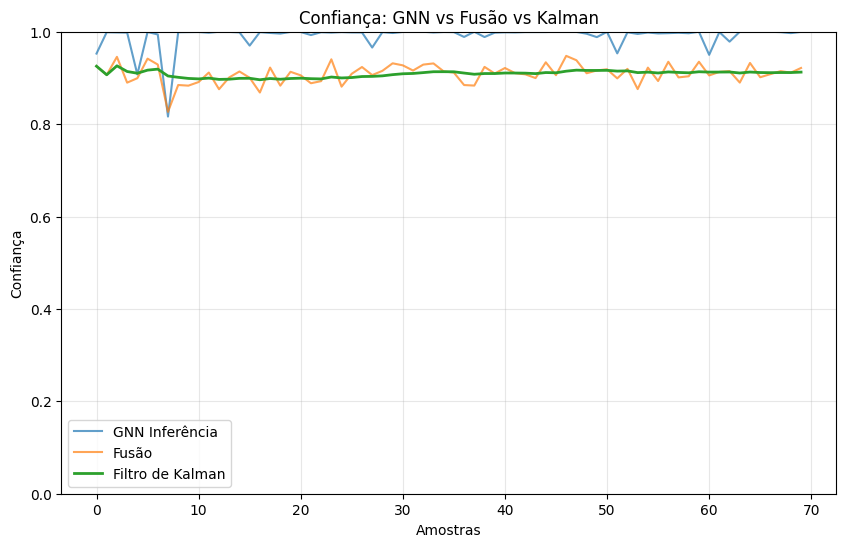

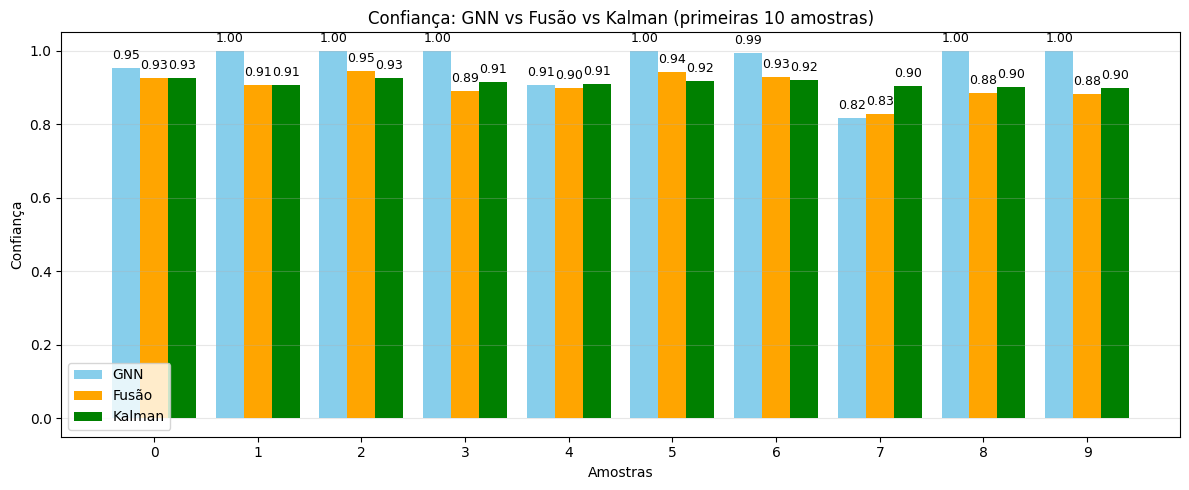

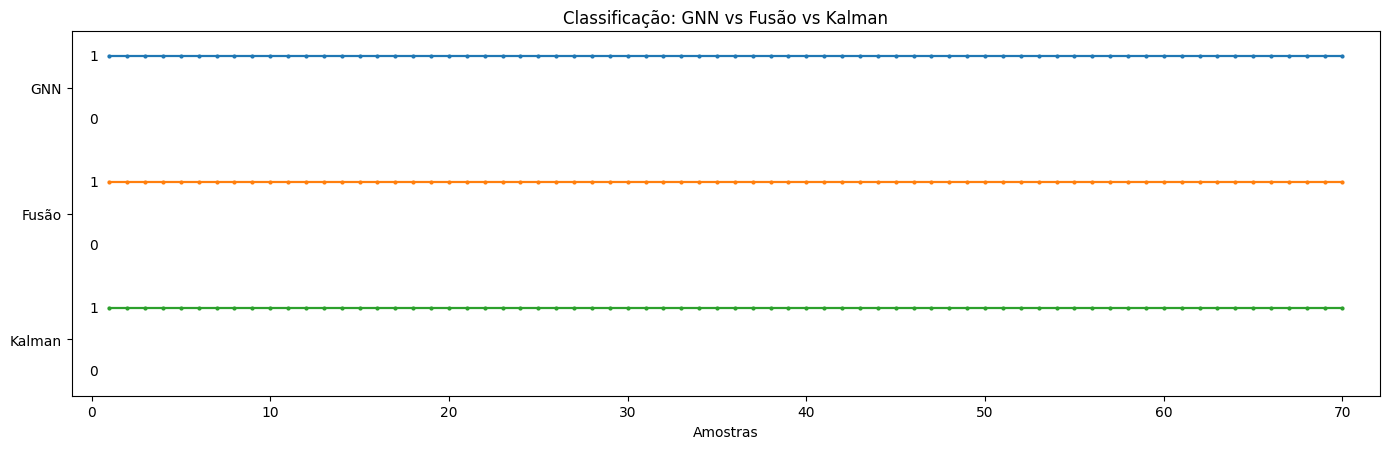

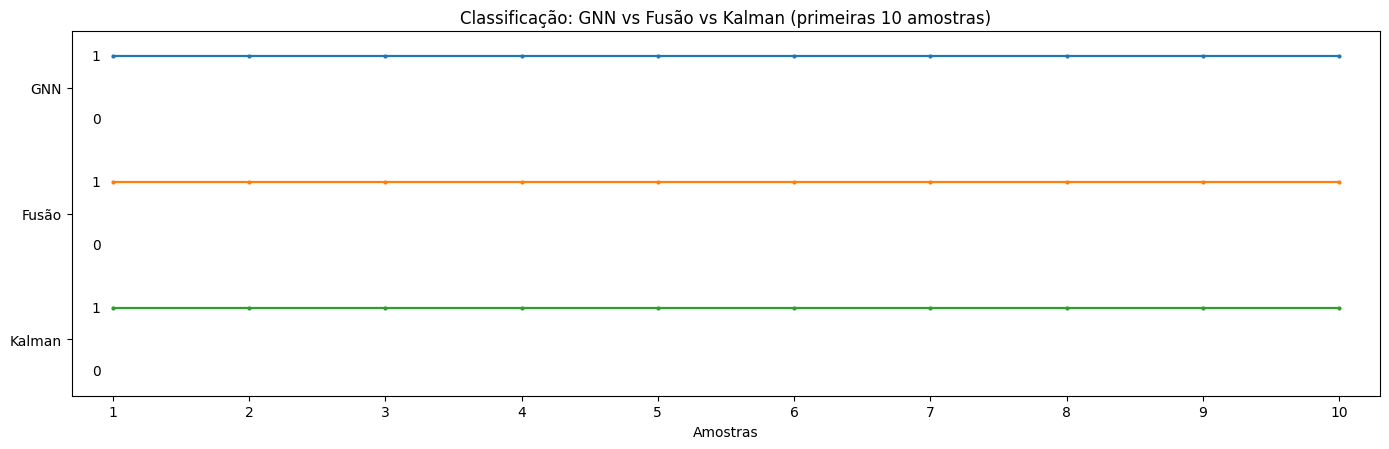

In [155]:
%run 7.results.ipynb